# <center style="font-family: consolas; font-size: 32px; font-weight: bold;">  Building Visual Questioning Answering System Using Hugging Face Open-Source Models </center>


Visual Question Answering (VQA) is a complex task that combines computer vision and natural language processing to enable systems to answer questions about images.

In this notebook, we explore the creation of a VQA system using Hugging Face’s open-source models. The article begins with an introduction to multimodal models and the VQA task, providing foundational knowledge for understanding how these systems operate.

We then guide you through setting up the working environment and loading the necessary models and processors. By preparing both image and text inputs, we illustrate how to perform visual question answering.

This step-by-step tutorial demonstrates how to leverage Hugging Face’s powerful tools to build sophisticated VQA systems, enhancing readers’ understanding of multimodal AI applications.


#### <a id="top"></a>
# <div style="box-shadow: rgb(60, 121, 245) 0px 0px 0px 3px inset, rgb(255, 255, 255) 10px -10px 0px -3px, rgb(31, 193, 27) 10px -10px, rgb(255, 255, 255) 20px -20px 0px -3px, rgb(255, 217, 19) 20px -20px, rgb(255, 255, 255) 30px -30px 0px -3px, rgb(255, 156, 85) 30px -30px, rgb(255, 255, 255) 40px -40px 0px -3px, rgb(255, 85, 85) 40px -40px; padding:20px; margin-right: 40px; font-size:30px; font-family: consolas; text-align:center; display:fill; border-radius:15px; color:rgb(60, 121, 245);"><b>Table of contents</b></div>

<div style="background-color: rgba(60, 121, 245, 0.03); padding:30px; font-size:15px; font-family: consolas;">
<ul>
    <li><a href="#1" target="_self" rel=" noreferrer nofollow">1. Introduction to Multimodal Models </a> </li>
    <li><a href="#2" target="_self" rel=" noreferrer nofollow">2. Introduction to Visual Questioning Answering Task </a></li>
    <li><a href="#3" target="_self" rel=" noreferrer nofollow">3. Setting Up Working Environment </a></li>
    <li><a href="#4" target="_self" rel=" noreferrer nofollow">4. Loading the Model and Processor </a></li>
    <li><a href="#5" target="_self" rel=" noreferrer nofollow">5. Preparing the Image and Text </a></li>
    <li><a href="#6" target="_self" rel=" noreferrer nofollow">6. Performing Visual Questioning-Answering </a></li>
    
    
    
</ul>
</div>

***


<a id="1"></a>
# <div style="box-shadow: rgba(0, 0, 0, 0.16) 0px 1px 4px inset, rgb(51, 51, 51) 0px 0px 0px 3px inset; padding:20px; font-size:32px; font-family: consolas; text-align:center; display:fill; border-radius:15px;  color:rgb(34, 34, 34);"> <b> 1. Introduction to Multimodal Models </b></div>


When a task requires a model to take more than one type of data, such as an image and a sentence, we call it multimodal. Multimodal models are designed to handle and integrate different forms of input, like text, images, audio, and even video, to perform a variety of tasks.

These models are increasingly important in applications that require a deep understanding of complex data, such as image captioning, visual question answering (VQA), and multimodal content creation.

One prominent example of a multimodal model is ChatGPT with GPT-4. This model allows users to send text, images, and even audio, making it a versatile tool for a wide range of applications.

GPT-4 can understand and generate human-like text, and when enhanced with multimodal capabilities, it can also interpret images and audio, offering responses that are contextually relevant across different types of data.

**Multimodal models have numerous applications across various fields:**

1. **Image Captioning:** Generating descriptive captions for images by understanding the content within them.
2. **Visual Question Answering (VQA):** Answering questions about the contents of an image by combining natural language processing with computer vision.
3. **Text-to-Image Generation:** Creating images based on textual descriptions, useful in creative industries and design.
4. **Speech Recognition and Synthesis:** Converting speech to text and vice versa, enhancing communication tools and accessibility.
5. **Augmented Reality (AR) and Virtual Reality (VR):** Integrating multiple data types to create immersive and interactive experiences.

In this article, we will explore one of these tasks which is image-text retrieval or matching. In the coming articles of this series, we will cover the rest of these topics.

<a id="2"></a>
# <div style="box-shadow: rgba(0, 0, 0, 0.16) 0px 1px 4px inset, rgb(51, 51, 51) 0px 0px 0px 3px inset; padding:20px; font-size:32px; font-family: consolas; text-align:center; display:fill; border-radius:15px;  color:rgb(34, 34, 34);"> <b> 2. Introduction to Visual Questioning Answering Task </b></div>


Visual Question Answering (VQA) is a computer vision task involving answering questions about an image. The goal of VQA is to teach machines to understand the contents of images and provide answers in natural language. Questions are typically open-ended and may require an understanding of vision, language, and commonsense knowledge to answer.

VQA has gained attention in the AI community due to its challenge in enabling computers to comprehend image contents similar to humans. It has been suggested that the problem is AI-complete, confronting the Artificial General Intelligence problem. Applications of VQA include aids for visually impaired individuals, education, customer service, and image retrieval.

<a id="3"></a>
# <div style="box-shadow: rgba(0, 0, 0, 0.16) 0px 1px 4px inset, rgb(51, 51, 51) 0px 0px 0px 3px inset; padding:20px; font-size:32px; font-family: consolas; text-align:center; display:fill; border-radius:15px;  color:rgb(34, 34, 34);"> <b> 3. Setting Up Working Environment </b></div>


Let’s start by setting up the working environments. First, we will download the packages we will use in this article. We will download the Transformers package and the torch package to use Pytorch.



In [1]:
!pip install -q transformers torch

<a id="4"></a>
# <div style="box-shadow: rgba(0, 0, 0, 0.16) 0px 1px 4px inset, rgb(51, 51, 51) 0px 0px 0px 3px inset; padding:20px; font-size:32px; font-family: consolas; text-align:center; display:fill; border-radius:15px;  color:rgb(34, 34, 34);"> <b> 4. Loading the Model and Processor </b></div>


We will need to load the model and the processor to perform the task. First, to load the model, we need to import the BlipForQuestionAnswering class from the Transformers library.

Then, to load the model, you just need to call the class we imported and use the from_pretrained method to load the checkpoint. We will use the [Blip model from Salesforce](https://huggingface.co/Salesforce/blip-itm-base-coco) for this task, and this is the related checkpoint for this specific task.



In [2]:
from transformers import AutoProcessor, AutoModelForVisualQuestionAnswering

model = AutoModelForVisualQuestionAnswering.from_pretrained("Salesforce/blip-vqa-base")  

config.json:   0%|          | 0.00/4.56k [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/1.54G [00:00<?, ?B/s]

As for the processor, it’s practically the same. We need to import the AutoProcessor class from Transformers. To load the correct processor, we use the from_pretrained method and pass the related checkpoint. The processor’s role is to process the image and the text for the model.

In [3]:
from transformers import AutoProcessor
processor = AutoProcessor.from_pretrained("Salesforce/blip-vqa-base")

preprocessor_config.json:   0%|          | 0.00/445 [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/592 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/711k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/125 [00:00<?, ?B/s]

/opt/conda/lib/python3.10/site-packages/transformers/tokenization_utils_base.py:1617: FutureWarning: `clean_up_tokenization_spaces` was not set. It will be set to `True` by default. This behavior will be deprecated in transformers v4.45, and will be then set to `False` by default. For more details check this issue: https://github.com/huggingface/transformers/issues/31884
  warnings.warn(


<a id="5"></a>
# <div style="box-shadow: rgba(0, 0, 0, 0.16) 0px 1px 4px inset, rgb(51, 51, 51) 0px 0px 0px 3px inset; padding:20px; font-size:32px; font-family: consolas; text-align:center; display:fill; border-radius:15px;  color:rgb(34, 34, 34);"> <b> 5. Preparing the Image and Text </b></div>

The next step is to get the image and the text that we will pass to the processor. The processor will modify the image and the text so the model can understand them.

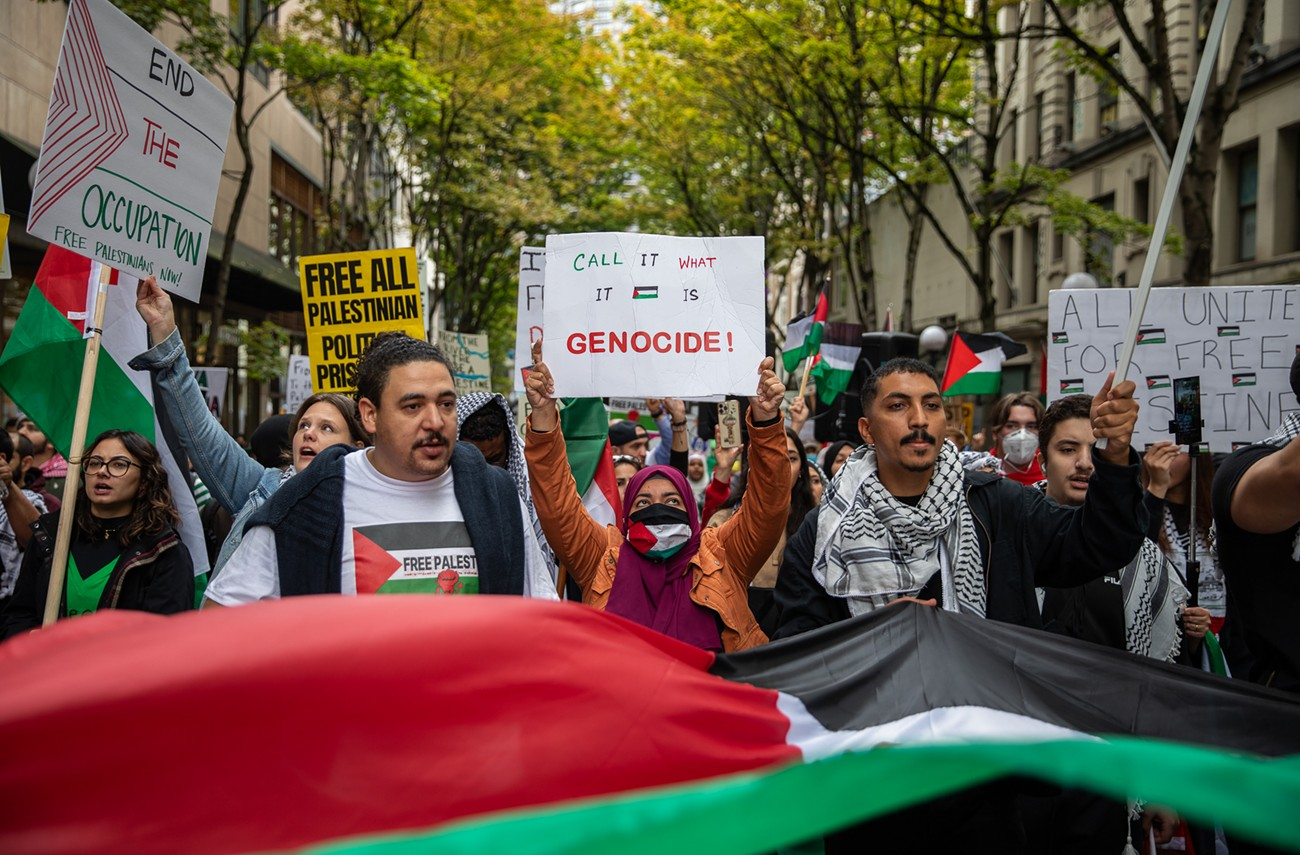

In [4]:
from PIL import Image
image = Image.open("/kaggle/input/palestine-demo-picture/palestine demo.jpg")
image

Now that we have the image, we will check if the model can successfully answer the question and return the answer:

In [5]:
question = "Which country does the flags belong to?"

<a id="6"></a>
# <div style="box-shadow: rgba(0, 0, 0, 0.16) 0px 1px 4px inset, rgb(51, 51, 51) 0px 0px 0px 3px inset; padding:20px; font-size:32px; font-family: consolas; text-align:center; display:fill; border-radius:15px;  color:rgb(34, 34, 34);"> <b> 6. Performing Visual Questioning Answering </b></div>


First, we need to get the inputs that the model can understand. To do that, we need to call the processor and pass a few arguments: the image, the text, and return_tensors set to ‘pt’ for PyTorch to get a PyTorch tensor at the end.


In [6]:
inputs = processor(image, question, return_tensors="pt")
out = model.generate(**inputs)
print(processor.decode(out[0], skip_special_tokens=True))

italy


/opt/conda/lib/python3.10/site-packages/transformers/generation/utils.py:1220: UserWarning: Using the model-agnostic default `max_length` (=20) to control the generation length. We recommend setting `max_new_tokens` to control the maximum length of the generation.
  warnings.warn(


Let’s print the inputs to see what it looks like. As you can see, we have a dictionary of multiple arguments: pixel values, input IDs, and the attention mask. Now we have everything.

In [7]:
inputs

{'pixel_values': tensor([[[[ 0.0763,  0.0909,  0.0033,  ..., -0.5660, -0.6390, -0.7266],
          [ 0.0763,  0.1055,  0.0033,  ..., -0.5806, -0.6390, -0.7266],
          [ 0.0909,  0.1055,  0.0033,  ..., -0.5368, -0.6244, -0.7120],
          ...,
          [-0.2302, -0.2156, -0.1718,  ..., -1.7923, -1.7923, -1.7923],
          [-0.2594, -0.2448, -0.2010,  ..., -1.7923, -1.7923, -1.7923],
          [-0.2886, -0.2740, -0.2594,  ..., -1.7923, -1.7923, -1.7923]],

         [[-0.0112,  0.0038, -0.1012,  ..., -0.5365, -0.6115, -0.7166],
          [-0.0112,  0.0188, -0.1012,  ..., -0.5365, -0.6115, -0.7166],
          [ 0.0038,  0.0188, -0.1012,  ..., -0.5065, -0.5965, -0.7016],
          ...,
          [-1.3919, -1.3769, -1.3769,  ..., -1.2718, -1.1818, -1.1218],
          [-1.4069, -1.4069, -1.3919,  ..., -1.4369, -1.3469, -1.2869],
          [-1.4219, -1.4369, -1.4369,  ..., -1.5870, -1.5120, -1.4519]],

         [[-0.0440, -0.0440, -0.1435,  ..., -0.5417, -0.5986, -0.6697],
          [-0

Finally, we will decode the generated token IDs into a human-readable string, omitting any special tokens.

In [8]:
out = model.generate(**inputs)
print(processor.decode(out[0], skip_special_tokens=True))


italy


We can see the answer is not right but it is due to the fact that the italian flag colors are similar to the palestinain. 